In [19]:
import yfinance as yf

new_var = 'PANW'
df = yf.download(new_var, start="2020-04-27", end="2025-04-26")

[*********************100%***********************]  1 of 1 completed


In [17]:
df.columns

MultiIndex([( 'Close', 'PANW'),
            (  'High', 'PANW'),
            (   'Low', 'PANW'),
            (  'Open', 'PANW'),
            ('Volume', 'PANW')],
           names=['Price', 'Ticker'])

TypeError: concat() takes 1 positional argument but 2 were given

In [20]:
df.to_csv('PANW.csv')

In [21]:
import pandas as pd

In [22]:
df=pd.read_csv('PANW.csv')

In [23]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,PANW,PANW,PANW,PANW,PANW
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-04-27,32.813331604003906,33.3033332824707,32.53499984741211,32.71500015258789,8986800
3,2020-04-28,32.258331298828125,33.44166564941406,32.19333267211914,33.33333206176758,6178200
4,2020-04-29,32.95000076293945,33.336666107177734,32.650001525878906,32.86833190917969,6318000


In [24]:
df.tail()

,Price,Close,High,Low,Open,Volume
1254,2025-04-21,160.0500030517578,165.9499969482422,157.60000610351562,165.08999633789062,4555100
1255,2025-04-22,163.6300048828125,165.36000061035156,160.27000427246094,162.4600067138672,4005300
1256,2025-04-23,168.32000732421875,172.52000427246094,167.3300018310547,168.74000549316406,4924400
1257,2025-04-24,176.0399932861328,176.4499969482422,169.07000732421875,169.35000610351562,4023400
1258,2025-04-25,178.97999572753906,179.5,175.3300018310547,176.49000549316406,3534800


In [27]:
df1=df.reset_index()['Close']

In [28]:
df1

,Close
0,PANW
1,NaN
2,32.813331604003906
3,32.258331298828125
4,32.95000076293945
...,...
1254,160.0500030517578
1255,163.6300048828125
1256,168.32000732421875
1257,176.0399932861328


TypeError: 'value' must be an instance of str or bytes, not a float

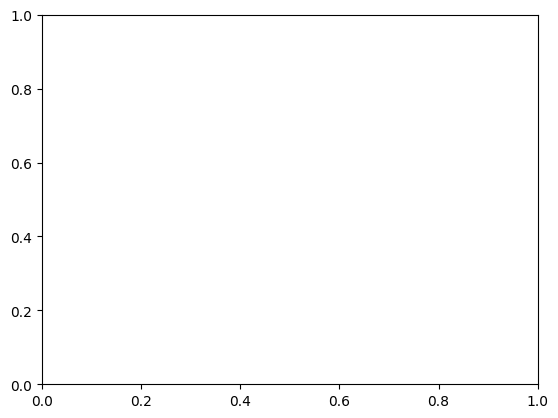

In [29]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

0       242.36
1       241.83
2       244.20
3       239.45
4       238.39
         ...  
1252    290.12
1253    287.58
1254    282.16
1255    285.24
1256    280.58
Name: close, Length: 1257, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.22113893]
 [0.22007131]
 [0.2248454 ]
 ...
 [0.30131136]
 [0.30751566]
 [0.29812864]]


In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[0.22113893],
       [0.22007131],
       [0.2248454 ],
       [0.21527708],
       [0.21314183],
       [0.22218641],
       [0.21922527],
       [0.21678787],
       [0.22083677],
       [0.21048285],
       [0.21406845],
       [0.21412888],
       [0.21793606],
       [0.22146123],
       [0.22833028],
       [0.22577201],
       [0.23294321],
       [0.22540942],
       [0.21523679],
       [0.20723969],
       [0.21493463],
       [0.21858067],
       [0.22264972],
       [0.22738352],
       [0.22814898],
       [0.23491731],
       [0.23417199],
       [0.22925689],
       [0.22994178],
       [0.23807989],
       [0.23217775],
       [0.21277924],
       [0.21336341],
       [0.21201378],
       [0.20621236],
       [0.18516206],
       [0.18989586],
       [0.17559374],
       [0.1858268 ],
       [0.18741817],
       [0.18353041],
       [0.19168866],
       [0.1922124 ],
       [0.16761678],
       [0.16856354],
       [0.16497794],
       [0.16667002],
       [0.144

In [ ]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 377ms/step - loss: 0.0761 - val_loss: 0.0042
Epoch 2/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0120 - val_loss: 0.0091
Epoch 3/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0066 - val_loss: 0.0018
Epoch 4/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 5/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 6/100
12/12 [==============================] - 3s 228ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 7/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 8/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 9/100
12/12 [==============================] - 3s 282ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 10/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0029 - val_l

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 40ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

371.3302909017629

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

238.57971417698965

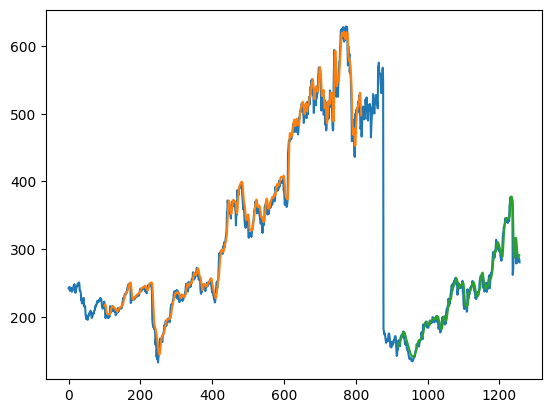

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.21072457345446483,
 0.21394758576234307,
 0.21346413391616137,
 0.22246842455129623,
 0.22617488870535624,
 0.23725399351368776,
 0.22349575972443242,
 0.2103418407429043,
 0.22057490482041775,
 0.21856052212799387,
 0.22160223999355394,
 0.24359929899482297,
 0.2478899341296859,
 0.25902947041879015,
 0.24897770078359488,
 0.221018069012751,
 0.2316741534556735,
 0.2578208408033357,
 0.2647906049191225,
 0.2629978043228652,
 0.2689200894385914,
 0.2749833813427874,
 0.2925890860745724,
 0.31490844630662934,
 0.32735733134580897,
 0.32951272082670263,
 0.3102753661140543,
 0.3227041073263098,
 0.31146385190258435,
 0.3243760449610216,
 0.33406522571158065,
 0.33700622444251954,
 0.34848820578933576,
 0.3651672944826058,
 0.33813427875027696,
 0.3519529440203049,
 0.3525169711741836,
 0.3545917853473803,
 0.33922204540418593,
 0.336039320750156,
 0.33364220534617156,
 0.338899744173398,
 0.3322119936345506,
 0.32834437886509676,
 0.3269343109804,
 0.3149285901335535,
 0.3099933525371

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps-1,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.3194176]
100
[0.3194176]
101
2 day input [0.21394759 0.21346413 0.22246842 0.22617489 0.23725399 0.22349576
 0.21034184 0.2205749  0.21856052 0.22160224 0.2435993  0.24788993
 0.25902947 0.2489777  0.22101807 0.23167415 0.25782084 0.2647906
 0.2629978  0.26892009 0.27498338 0.29258909 0.31490845 0.32735733
 0.32951272 0.31027537 0.32270411 0.31146385 0.32437604 0.33406523
 0.33700622 0.34848821 0.36516729 0.33813428 0.35195294 0.35251697
 0.35459179 0.33922205 0.33603932 0.33364221 0.33889974 0.33221199
 0.32834438 0.32693431 0.31492859 0.30999335 0.30360776 0.30286244
 0.31609693 0.33809399 0.36965937 0.3845658  0.38809097 0.40180892
 0.39780029 0.40930242 0.41327075 0.42920452 0.42624338 0.41830671
 0.41820599 0.42273835 0.42839877 0.42968797 0.41482183 0.41776283
 0.42801603 0.42684769 0.42082469 0.46717563 0.47225188 0.49215398
 0.48222307 0.47474971 0.47489072 0.47196986 0.4710231  0.4703785
 0.26064098 0.27242512 0.30117036 0.34284793 0.3669601  0.36978023
 0.35849969 0.342082

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1257

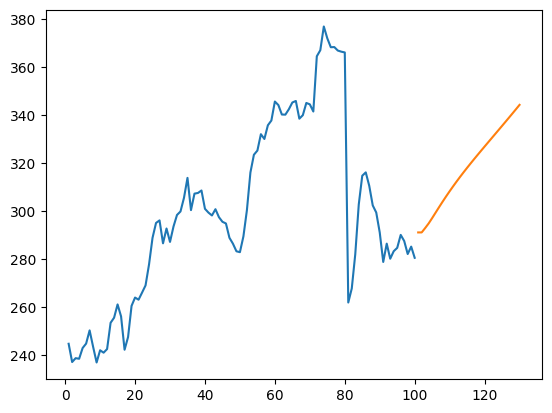

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

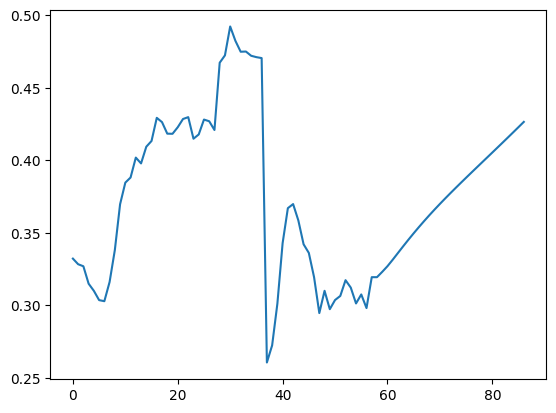

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

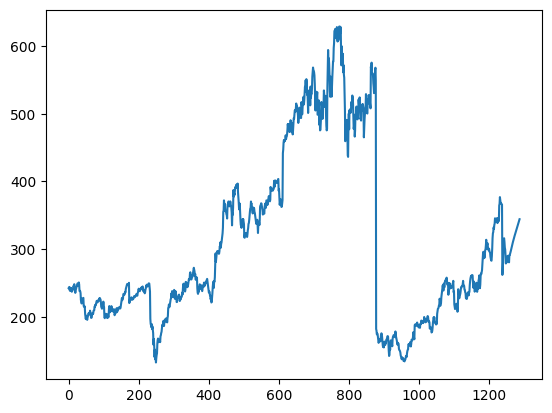

In [ ]:
plt.plot(df3)